#Ex03 - Solução

Considerando o problema descrito em https://github.com/glaucogoncalves/p-e/tree/main/ex03, encararemos o problema como não-determinístico.

## Estabelecendo o problema
A principal pergunta é: "quantas cocadas Astra deveria produzir para maximizar seu lucro?" O problema nos dá alguns dados interessantes:

1. a média de vendas por hora (5) e o número de horas trabalhadas
2. que as cocadas são produzidas em fornadas de 20 cocadas, ao custo de R\$ 10,00
3. que as cocadas são vendidas a R\$ 3,00 cada
4. E que uma em cada 100 não passa pelo controle de qualidade

Portanto, temos aqui **duas** variáveis aleatórias evidentes. A quantidade de clientes que compram cocadas em um dia (vamos denotar por $C$). Como temos um caso típico de uma <u>distribuição de Poisson</u> (eventos dentro de uma escala de tempo), com uma média ($\lambda$) de <u>40 clientes por dia</u>. A outra variável indica a quantidade de cocadas "boas" produzidas por Astra (vamos denotar por $B$). Esta variável pode ser modelada por uma distribuição Binomial com $p=0.99$ (a chance de uma cocada estar boa) e com $n$ sendo dado pelo número de cocadas produzidas (como são doces, são referidas por $d$).

Deve-se observar que o número de cocadas está relacionado às fornadas (20 por fornada), portanto a resposta deveria levar isto em conta.

## Análise do Lucro
Em primeiro lugar precisamos definir o Lucro de Astra. O Lucro é dado pela diferença entre a receita e a despesa, sendo esta uma nova variável aleatória, dependente do número de doces produzidos $d$) que pode ser descrita por

$L(d) = 3\min(C,B) - 0.5*d $

onde $C \sim Poisson(\lambda = 40)$ e $B \sim Binomial(n=d,p=0.99)$.

Esta função procura obter o lucro considerando o custo de produção de cada unidade de doce (R\$ 0,50), dessa forma, evitamos introduzir maior complexidade no problema, ao tratar as fornadas.

Deve-se observar que as variáveis $Lucro(.)$ e $B$ dependem diretamente do parâmetro $d$. Este fato, aliado ao uso da função $\min(.)$ tornam a análise da VA $Lucro(.)$ (i.e,, obtenção da distribuição de probabilidade, esperança, variância etc) mais complexa de ser realizada analiticamente.

Contudo podemos tentar outras estratégias.

## Análise do estoque

Como nós queremos maximizar o lucro, devemos entender que se Astra produz e não vende, então ele não alcançará o máximo de lucro com aquela produção ($d$). Portanto, podemos dizer que, Astra maximiza seu lucro em um dia, quando seu estoque é zero ao fim do dia.

Para modelar o estoque de Astra iremos usar a variável aleatória $Es$ que será <u>a diferença entre o número de doces bons e o número de clientes que compram</u>. Formalmente, podemos definir como $Es = B - C$. Observe que um estoque real não pode ser negativo, contudo deixaremos a variável aleatória desta forma por simplicidade, já que o estoque também acaba, quando a $C \gt B$.

Assim, dada uma produção $d$, Astra atinge o máximo lucro com esta produção quando $Es \leq 0$. Embora o obtenção da função de distribuição de probabilidade desta variável não seja trivial, a obtenção da esperança é. Assim temos que

$E(Es) = E(B - C) = E(B) - E(C) = dp - \lambda = 0.99d - 40$

De posse deste dado, podemos definir quais os valores de $c$ em que o estoque, em média, será vazio ou negativo ($E(Es) \leq 0$). Assim temos

$0.99d - 40 \leq 0 \\
d \le 40.404040\ldots$

Logo, uma produção de 40 cocadas (duas fornadas) permite que em média o estoque acabe e o lucro máximo seja atingido.

### Crítica

Um argumento que poderia ser usado contra esta abordagem é: se nós queremos determinar o máximo lucro, de acordo com a quantidade de cocadas produzidas $d$, então pode ser que produzindo mais de 40 cocadas e vendendo mais, poderia trazer um lucro maior, mesmo sem vender todo o estoque (ou seja, $E(Es) \gt 0$).

Por exemplo, a produção de 60 cocadas com uma venda de 44 cocadas dá um Lucro de 102,00 reais, que é maior do que o lucro de vender todas as 40 cocadas produzidas (100,00 reais).

A crítica, de fato, é pertinente e o aumento do número de cocadas produzidas aumenta as chances de ter um lucro maior, pois a probabilidade de vender entre 44 e 60 cocadas é de 23\%, aproximadamente.

In [ ]:
import scipy.stats as st

a = 44
b = 60
p = st.poisson.cdf(b,40) - st.poisson.cdf(a,40)
print("probabilidade de vender entre",a,"e",b,"cocadas é",p)

probabilidade de vender entre 44 e 60 cocadas é 0.23311407343899093


Contudo, deve-se considerar que o aumento da produção aumenta também o custo de produção. Assim, o lucro não é o mesmo, mesmo que a quantidade vendida seja a mesma.

Por exemplo, quando $d=40$ e são vendidas 30 cocadas, Astra tem lucro de 70 reais. Quando $d=60$ e Astra vende as mesmas 30 cocadas seu lucro é de 60 reais.

Esta diferença entre os lucros não ocorre apenas com 30 cocadas vendidas, mas se repete por diversos valores da variável $C$. Na realidade, sabemos que a operação com $d=60$ só dá algum lucro se 11 ou mais cocadas forem vendidas e que este lucro é menor do que a produção de $d=40$ até o caso quando 43 cocadas são vendidas. Assim, deve-se observar que há uma probabilidade muito grande (~72\%), portanto, da produção $d=60$ ter menor lucro do que a operação com $d=40$.

In [ ]:
import scipy.stats as st

a = 11
b = 43
p = st.poisson.cdf(b,40) - st.poisson.cdf(a,40)
print("probabilidade de vender entre",a,"e",b,"cocadas é",p)

probabilidade de vender entre 11 e 43 cocadas é 0.7162241024948953


No fim, há uma grande chance de que o lucro com $d=60$ seja inferior ao lucro com $d=40$, o que faz com que a crítica não se sustente diante da distribuição do número de clientes que compram cocada.

Deve-se observar ainda que a esperança, oferece uma boa estratégia para análise, porque consegue capturar o tendência geral da distribuição, levando em conta o comportamento da distribuição. Assim, caso a média de $C$ fosse 60 ($\lambda = 60$), por exemplo, uma produção $d=60$ traria maior lucro do que $d=40$.

##Solução por simulação

Uma forma alternativa de resolver este problema é usarmos simulação para determinar a <u>distribuição, a esperança e a variância</u> da variável $Lucro(d)$.

Começamos definindo uma quantidade de dias de trabalho para a simulação. Este parâmetro é fundamental na simulação e controla a qualidade das probabilidades experimentais obtidas. Para cada dia, sorteamos a quantidade de clientes (usando uma distribuição de Poisson com média de 40 clientes).

Como as cocadas são preparadas em fornadas, avaliaremos um número de fornadas variando entre 1, 2, 3, 4 e 5 fornadas (respectivamente 20, 40, 60, 80 e 100 cocadas) e avaliaremos estes casos frente ao maior lucro.

Para cada caso de fornada, geraremos o número de cocadas boas para cada um dos dias simulados e usaremos este valor para calcular o lucro de cada dia que é dado por

$Lucro(cliente,cocada\_boa,cocada\_total) = 3 \times \min(cliente,cocada\_boa) - 0.5 \times cocada\_total$

Cocadas produzidas 20 Lucro esperado 49.484 Desvio padrão do lucro 1.3117265362963793
Cocadas produzidas 40 Lucro esperado 90.748 Desvio padrão do lucro 10.439560993401004
Cocadas produzidas 60 Lucro esperado 88.092 Desvio padrão do lucro 18.613904635597887
Cocadas produzidas 80 Lucro esperado 78.092 Desvio padrão do lucro 18.613904635597887
Cocadas produzidas 100 Lucro esperado 68.092 Desvio padrão do lucro 18.613904635597887


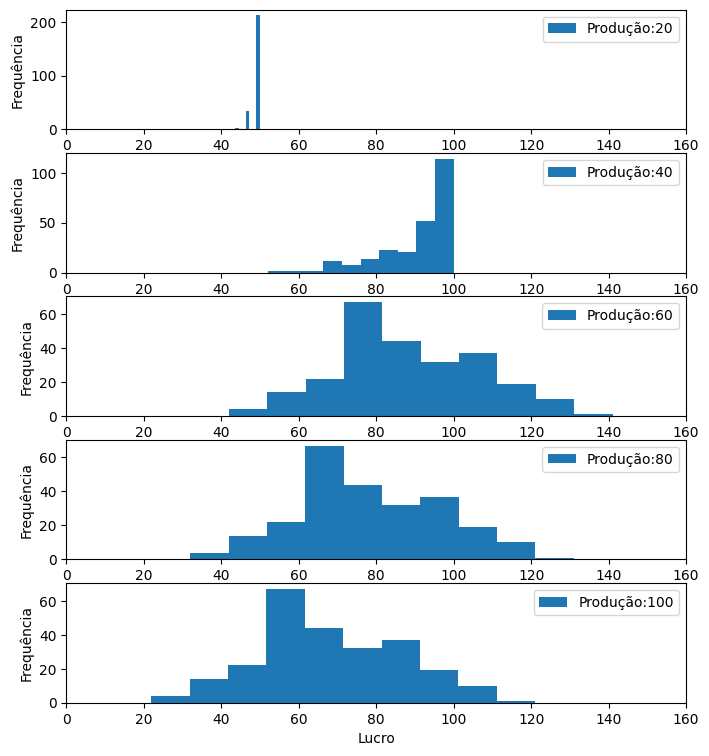

In [ ]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

dias = 250

plt.figure(figsize=(8,9))
idx = 1

cli_dia = st.poisson.rvs(40,size=dias)
for cocada_total in range(20,120,20):
  cocada_boa = st.binom.rvs(cocada_total,0.99,size=dias)
  def lucro(cli,coc):
    return 3*min(cli,coc)-0.5*cocada_total
  lucro_dia = list(map(lucro,cli_dia,cocada_boa))
  Elucro = np.mean(lucro_dia)
  Stdlucro = np.std(lucro_dia,ddof=1)
  plt.subplot(5,1,idx)
  idx += 1
  plt.hist(lucro_dia, label="Produção:"+str(cocada_total))
  plt.xlim(0,160)
  plt.xlabel("Lucro")
  plt.ylabel("Frequência")
  plt.legend()
  print("Cocadas produzidas",cocada_total,"Lucro esperado",Elucro,"Desvio padrão do lucro",Stdlucro)

## Conclusão

Como se pode observar, a produção de 40 cocadas é a melhor alternativa para maximizar o lucro de Astra. Deve-se comentar ainda sobre o papel que a variável aleatória $B$ tem sobre o resultado. Como visto, a probabilidade de obtermos uma cocada boa é bem alta o que faz com  que a maioria das cocadas sejam boas. Em uma fornada de 20 comumente temos 20, 19 ou - raramente - 18 cocadas boas. Isso faz com que não haja necessidade de Astra fazer mais cocadas para compensar as perdas. Tal não ocorreria caso $p$ fosse menor, contudo a análise pelo estoque e pela simulação conseguiriam capturar isso.